In [1]:
import jif
import numpy as np
import pprint
import matplotlib.pyplot as plt
%matplotlib inline

## Initialize roaster from YAML file

In [2]:
rstr = jif.Roaster("roaster.yaml")

In [3]:
pprint.pprint(rstr.config)

{'data': {'data_format': 'jif_segment',
          'epoch_num': -1,
          'filters': 'r',
          'segment_number': 0,
          'telescope': 'LSST'},
 'infiles': {'infile_1': 'output/roaster_model_image.h5'},
 'init': {'init_param_file': 'roaster_params.cfg', 'seed': 9216526},
 'metadata': {'outfile': '../output/TestData/roaster_out'},
 'model': {'achromatic': True,
           'galaxy_model_type': 'Spergel',
           'model_params': 'nu',
           'num_sources': 1},
 'run': {'debug': False, 'output_model': True, 'quiet': True},
 'sampling': {'nburn': 200,
              'nsamples': 500,
              'nthreads': 1,
              'nwalkers': 32,
              'sampler': 'emcee'}}


## Make the fake image data

In [5]:
images = rstr.render_model_images(nimages=1, nx=[80], ny=[80],
                                  tel_names=['LSST'], psfs=['model'], noise_var=1.e2)

2017-03-24 23:49:15,864 - DEBUG - Setting redshift to 1.000000
2017-03-24 23:49:15,866 - DEBUG - Setting nu to 0.500000
2017-03-24 23:49:15,868 - DEBUG - Setting hlr to 1.000000
2017-03-24 23:49:15,869 - DEBUG - Setting e1 to 0.000000
2017-03-24 23:49:15,870 - DEBUG - Setting e2 to 0.000000
2017-03-24 23:49:15,871 - DEBUG - Setting mag_sed1 to 27.500000
2017-03-24 23:49:15,873 - DEBUG - Setting mag_sed2 to 99.000000
2017-03-24 23:49:15,874 - DEBUG - Setting mag_sed3 to 99.000000
2017-03-24 23:49:15,875 - DEBUG - Setting mag_sed4 to 99.000000
2017-03-24 23:49:15,877 - DEBUG - Setting dx to 0.000000
2017-03-24 23:49:15,878 - DEBUG - Setting dy to 0.000000


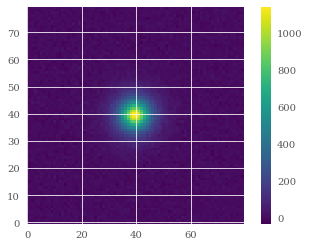

In [7]:
plt.imshow(images[0].array, interpolation='none', origin='lower')
plt.colorbar()

## Evaluate the image likelihood

In [8]:
rstr.model_paramnames

['nu']

In [9]:
nu = np.linspace(0.2, 0.8, 160)

lnp = np.array([rstr([nu_i]) for nu_i in nu])

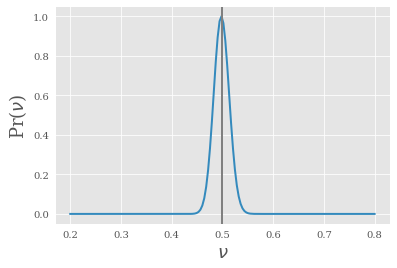

In [10]:
plt.plot(nu, np.exp(lnp - np.max(lnp)), color="#348ABD", alpha=1)
plt.axvline(0.5, color='grey')
plt.xlabel(r"$\nu$", fontsize=18)
plt.ylabel(r"Pr($\nu$)", fontsize=18)

## Loop the above sequence of operations over noise realizations

2017-03-25 00:43:31,003 - DEBUG - Setting redshift to 1.000000
2017-03-25 00:43:31,005 - DEBUG - Setting nu to 0.500000
2017-03-25 00:43:31,007 - DEBUG - Setting hlr to 1.000000
2017-03-25 00:43:31,008 - DEBUG - Setting e1 to 0.000000
2017-03-25 00:43:31,009 - DEBUG - Setting e2 to 0.000000
2017-03-25 00:43:31,010 - DEBUG - Setting mag_sed1 to 27.500000
2017-03-25 00:43:31,012 - DEBUG - Setting mag_sed2 to 99.000000
2017-03-25 00:43:31,013 - DEBUG - Setting mag_sed3 to 99.000000
2017-03-25 00:43:31,014 - DEBUG - Setting mag_sed4 to 99.000000
2017-03-25 00:43:31,015 - DEBUG - Setting dx to 0.000000
2017-03-25 00:43:31,016 - DEBUG - Setting dy to 0.000000
2017-03-25 00:43:31,414 - DEBUG - Setting redshift to 1.000000
2017-03-25 00:43:31,414 - DEBUG - Setting nu to 0.500000
2017-03-25 00:43:31,415 - DEBUG - Setting hlr to 1.000000
2017-03-25 00:43:31,416 - DEBUG - Setting e1 to 0.000000
2017-03-25 00:43:31,418 - DEBUG - Setting e2 to 0.000000
2017-03-25 00:43:31,419 - DEBUG - Setting mag_

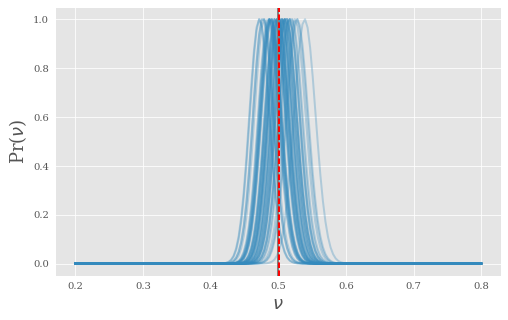

In [11]:
niter = 50
nu_ml = 0.0

fig = plt.figure(figsize=(8, 8/1.618))
for inoise in xrange(niter):
    images = rstr.render_model_images(nimages=1, nx=[80], ny=[80],
                                      tel_names=['LSST'], psfs=['model'], noise_var=1.e2)
    lnp = np.array([rstr([nu_i]) for nu_i in nu])
    nu_ml += nu[np.argmax(lnp)]
    plt.plot(nu, np.exp(lnp - np.max(lnp)), color="#348ABD", alpha=0.3)
nu_ml /= niter
plt.axvline(0.5, color='grey')
plt.axvline(nu_ml, color='red', linestyle='dashed')
plt.xlabel(r"$\nu$", fontsize=18)
plt.ylabel(r"Pr($\nu$)", fontsize=18)

## Input image from GREAT3-like simulation

In [74]:
from astropy.io import fits

iepoch = 0

In [75]:
f = fits.open("sim/control/ground/constant/epoch_catalog-000-0.fits")
sim_catalog = f[1].data

In [76]:
colnames = f[1].columns
f.close()
print colnames

ColDefs(
    name = 'num'; format = 'J'
    name = 'x'; format = 'D'
    name = 'y'; format = 'D'
    name = 'dx'; format = 'D'
    name = 'dy'; format = 'D'
    name = 'psf_e1'; format = 'D'
    name = 'psf_e2'; format = 'D'
    name = 'psf_fwhm'; format = 'D'
    name = 'g1'; format = 'D'
    name = 'g2'; format = 'D'
    name = 'gal_e1'; format = 'D'
    name = 'gal_e2'; format = 'D'
)


In [77]:
print colnames.__class__
print colnames.names

def colndx(colname):
    """
    Return the column index corresponding to the given name
    """
    return np.argwhere([x == colname for x in colnames.names])[0][0]
print colndx('gal_e1')

<class 'astropy.io.fits.column.ColDefs'>
['num', 'x', 'y', 'dx', 'dy', 'psf_e1', 'psf_e2', 'psf_fwhm', 'g1', 'g2', 'gal_e1', 'gal_e2']
10


In [78]:
sim_catalog[iepoch]

(0, 24.5, 24.5, -0.98060578946024179, -0.41024529468268156, 0.0, 0.0, 0.69999999999999996, 0.0014178461995583019, -0.041486870981251006, 0.0019704378462152999, -0.0030702104754297879)

### Load the data image

In [79]:
f = fits.open("sim/control/ground/constant/image-000-0.fits")
dat = f[0].data
f.close()

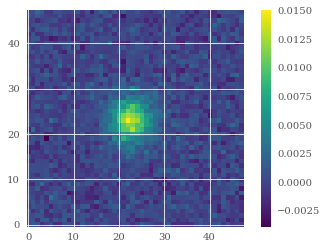

In [80]:
nx = 48
i, j = np.unravel_index(iepoch, (nx, nx))

dat_seg = dat[(i*nx):((i+1)*nx), (j*nx):((j+1)*nx)]
plt.imshow(dat_seg, interpolation='none', origin='lower')
plt.colorbar()

### Mimic the Roaster 'Load' function

The Load() function is not flexible enough for this problem. So we mimic the load functionality here.

In [81]:
rstr_sb = jif.Roaster("sim/roaster_shear_bias_test.yaml")

In [82]:
pprint.pprint(rstr_sb.config)

{'data': {'data_format': 'jif_segment',
          'epoch_num': -1,
          'filters': 'r',
          'segment_number': 0,
          'telescope': 'LSST'},
 'infiles': {'infile_1': './sim/roaster_model_image.h5'},
 'init': {'init_param_file': 'sim/roaster_params_shear_bias_test.cfg',
          'seed': 9216526},
 'metadata': {'outfile': './sim/roaster_out'},
 'model': {'achromatic': True,
           'galaxy_model_type': 'Spergel',
           'model_params': 'nu',
           'num_sources': 1},
 'run': {'debug': False, 'output_model': True, 'quiet': True},
 'sampling': {'nburn': 200,
              'nsamples': 500,
              'nthreads': 1,
              'nwalkers': 32,
              'sampler': 'emcee'}}


In [114]:
rstr_sb.pixel_data = [dat_seg]
# rstr_sb.pix_noise_var = [np.var(dat_seg[0:20, 0:20])]
rstr_sb.pix_noise_var = [1.e-6]

rstr_sb.num_epochs = 1
rstr_sb.nx = [nx]
rstr_sb.ny = [nx]
rstr_sb.filter_names = ['r']

rstr_sb._init_galaxy_models(nimages=1, tel_names=['LSST'], psfs=['model'])
rstr_sb.initialize_param_values(rstr_sb.config['init']['init_param_file'])

rstr_sb.set_param_by_name('dx', sim_catalog[iepoch][colndx('dx')]*0.2)
rstr_sb.set_param_by_name('dy', sim_catalog[iepoch][colndx('dy')]*0.2)
rstr_sb.set_param_by_name('e1', sim_catalog[iepoch][colndx('gal_e1')] - sim_catalog[iepoch][colndx('g1')])
rstr_sb.set_param_by_name('e2', sim_catalog[iepoch][colndx('gal_e2')] - sim_catalog[iepoch][colndx('g2')])

rstr_sb.set_param_by_name('mag_sed1', 40.35)
rstr_sb.set_param_by_name('hlr', 0.7)

2017-03-25 00:57:31,699 - DEBUG - Setting redshift to 1.000000
2017-03-25 00:57:31,701 - DEBUG - Setting nu to 0.500000
2017-03-25 00:57:31,702 - DEBUG - Setting hlr to 0.800000
2017-03-25 00:57:31,704 - DEBUG - Setting e1 to 0.001970
2017-03-25 00:57:31,705 - DEBUG - Setting e2 to -0.003070
2017-03-25 00:57:31,706 - DEBUG - Setting mag_sed1 to 40.350000
2017-03-25 00:57:31,707 - DEBUG - Setting mag_sed2 to 99.000000
2017-03-25 00:57:31,708 - DEBUG - Setting mag_sed3 to 99.000000
2017-03-25 00:57:31,710 - DEBUG - Setting mag_sed4 to 99.000000
2017-03-25 00:57:31,711 - DEBUG - Setting dx to -0.196000
2017-03-25 00:57:31,712 - DEBUG - Setting dy to -0.082000
2017-03-25 00:57:31,713 - DEBUG - Setting psf_fwhm_0 to 0.700000
2017-03-25 00:57:31,715 - DEBUG - Setting dx to -0.196121
2017-03-25 00:57:31,717 - DEBUG - Setting dy to -0.082049
2017-03-25 00:57:31,719 - DEBUG - Setting e1 to 0.000553
2017-03-25 00:57:31,720 - DEBUG - Setting e2 to 0.038417
2017-03-25 00:57:31,722 - DEBUG - Settin

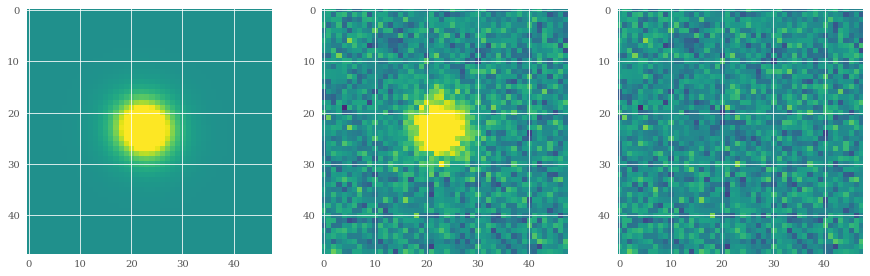

In [115]:
m = rstr_sb._get_model_image(iepochs=0)

vmin=-0.005
# vmax=0.013
vmax = 0.005

fig = plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(m.array, vmin=vmin, vmax=vmax)
plt.subplot(1, 3, 2)
plt.imshow(rstr_sb.pixel_data[0], vmin=vmin, vmax=vmax)
plt.subplot(1, 3, 3)
plt.imshow(rstr_sb.pixel_data[0] - m.array, vmin=vmin, vmax=vmax)

### Check the 'nu' posterior

In [116]:
nu = np.linspace(-0.3, 0.8, 200)

lnp = np.array([rstr_sb([nu_i]) for nu_i in nu])

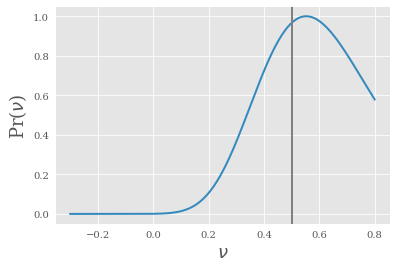

In [117]:
plt.plot(nu, np.exp(lnp - np.max(lnp)), color="#348ABD", alpha=1)
plt.axvline(0.5, color='grey')
plt.xlabel(r"$\nu$", fontsize=18)
plt.ylabel(r"Pr($\nu$)", fontsize=18)